# Exploration des données
L'objectif de ce Notebook est d'explorer le dataset de Netflix (echantillon numéro 1) en repondant aux questions suivantes : 
* Quel est le nombre total de notes ?
* Quel est le nombre total d'utilisateurs ?
* Quel est le nombre total de films ?
* Comment sont distribuées les notes ?
* Comment est distribué le nombre total de notes par utilisateur ?


In [1]:
#Module pour charger et manipuler les données
import pandas as pd 
#Module pour calculer les statistiques
import numpy as np
#Module pour generer les graphes
import matplotlib.pyplot as plt
#Module pour calculer le mode
import statistics
#Afficher les graphes directement
%matplotlib inline
from collections import Counter 

In [2]:
#Charger les données
data = pd.read_csv("/data/pfe/formated/merged_data.csv")
data.columns

Index(['Unnamed: 0', 'movie_id', 'customer_id', 'rating', 'date'], dtype='object')

On peut observer qu'on possède l'identifiant du film, l'identifiant du client, la note donnée et la date. Exemple avec les 10 premières lignes du jeu de données : 

In [3]:
data.head(10)

,Unnamed: 0,movie_id,customer_id,rating,date
0,0,1,1488844,3,2005-09-06
1,1,1,822109,5,2005-05-13
2,2,1,885013,4,2005-10-19
3,3,1,30878,4,2005-12-26
4,4,1,823519,3,2004-05-03
5,5,1,893988,3,2005-11-17
6,6,1,124105,4,2004-08-05
7,7,1,1248029,3,2004-04-22
8,8,1,1842128,4,2004-05-09
9,9,1,2238063,3,2005-05-11


# Nombre total de notes

In [4]:
print("Nombre total de notes : {}".format(data.shape[0]))

Nombre total de notes : 100480507


# Nombre total d'utilisateurs

In [5]:
nb_utilisateur = data.groupby('customer_id').size().count()
print("Nombre total d'utilisateurs : {}".format(nb_utilisateur))

Nombre total d'utilisateurs : 480189


# Nombre total de films

In [6]:
nb_films = data.groupby('movie_id').size().count()
print("Nombre total de films : {}".format(nb_films))

Nombre total de films : 17770


# Distribution des notes

L'objectif est ici d'étudier le nombre de 1, de 2, de 3, de 4 et de 5. Cela nous donnera une tendance de la manière dont les gens notent les films et séries sur Netflix.

In [7]:
notes = list(data['rating'])
counter = Counter(notes)

La distribution des notes est la suivante : 
* 1 118 186 personnes ont donné la note 1 
* 2 439 073 personnes ont donné la note 2
* 6 904 181 personnes ont donné la note 3
* 8 085 741 personnes ont donné la note 4
* 5 506 583 personnes ont donné la note 5

On peut visualiser cette distribution sur le notebook ci-dessous :

Text(0,0.5,'Number of ratings')

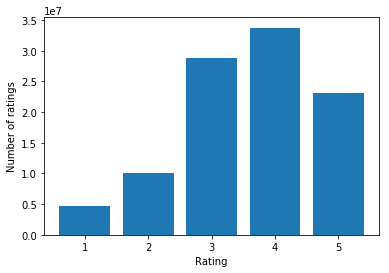

In [8]:
plt.bar(counter.keys(), counter.values())
plt.xlabel('Rating')
plt.ylabel('Number of ratings')

On remarque que la note la plus donnée est 4. Et il y a une forte concentration des notes au dessus de 3. On en déduit que les utilisateurs de Netflix ont plutôt tendance à noter le programme regardé lorsqu'ils l'ont apprécié. Il faut garder cela à l'esprit car cela peut introduire des biais dans notre systèmes de recommandation.

# Distribution du nombre total de notes par utilisateur

L'objectif de cette partie est de déterminer les statistisques sur le nombre de notes donné par utilisateur. Cela a une importance primordiale car les notes des utilisateurs constituent les données d'entraînement et plus elles seront fournies, plus le modèle de Machine Learning sera performant.

In [9]:
nb_notes_utilisateur = data.groupby('customer_id')["rating"].count()

In [10]:
v_max = max(nb_notes_utilisateur)
print("L'utilisateur ayant donné le plus de notes a donné {} notes".format(v_max))

L'utilisateur ayant donné le plus de notes a donné 17653 notes


In [11]:
v_min = min(nb_notes_utilisateur)
print("L'utilisateur ayant donné le moins de notes a donné {} note".format(v_min))

L'utilisateur ayant donné le moins de notes a donné 1 note


On voit que l'écart est significatif entre l'utilisateur ayant donné le plus de notes et celui qui en a donné le moins. Il sera très compliqué de prédire un programme pour un utilisateur ayant donné quasiment aucune indication sur ses goûts.

In [12]:
moyenne = np.mean(nb_notes_utilisateur)
print("La moyenne est de : {0:.2f}".format(moyenne))

La moyenne est de : 209.25


In [13]:
#Determine le point de données le plus fréquent/ plus populaire
mode = statistics.mode(nb_notes_utilisateur)
print("La note la plus donnée est :", mode)# Nb d'utilisateurs qui ont noté 2 fois = 17261

La note la plus donnée est : 18


Ceci est une donnée intéressante qu'il faut garder à l'esprit. Les utilisateurs semblent avoir donné peu de notes. Cela va donc être compliqué de recommander avec ci peu d'information sur leurs goûts.

In [14]:
#Calcul de la mediane : valeur centrale 
mediane = np.median(nb_notes_utilisateur)
print("50 % des utilisateurs ont donné {} notes ou moins".format(int(mediane)))

50 % des utilisateurs ont donné 96 notes ou moins


Cette donnée va dans le même sens que les précédentes et confirme que le jeu de données pour l'entraînement est constitué d'utilsateurs ayant donné peu de notes.

In [15]:
ecart = np.std(nb_notes_utilisateur)
print("L'ecart type est d'environ {0:.2f}".format(ecart))

L'ecart type est d'environ 302.34


In [16]:
variance = np.var(nb_notes_utilisateur)
print("La variance est d'environ {0:.2f} ".format(variance))

La variance est d'environ 91408.77 


L'écart type et la variance permettent de mesurer l'étendue des données et à quel point elles sont dispersées. Nos données indiquent que les données sont très dispersées et qu'il existe de forts écart entre certains point de données et la moyenne.

In [17]:
quantile1 = np.percentile(nb_notes_utilisateur, 25)
print(quantile1)

quantile2 = np.percentile(nb_notes_utilisateur, 75)
print(quantile2)

39.0
259.0


Ces données signifient qu'un quart des utilisateurs de ce dataset ont donné 8 notes ou moins et que trois quarts ont donné 64 notes ou moins. Ce sera donc un véritable challenge d'entraîner un système de recommandation basé sur les interactions entre l'utilisateur et les programmes.

Reprenons toutes ces statistiques sous la forme d'un diagramme à boîtes.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0f8fe78908>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0f8fe84208>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0f8fe787b8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0f8fe84a58>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0f8fe84e80>],
 'means': []}

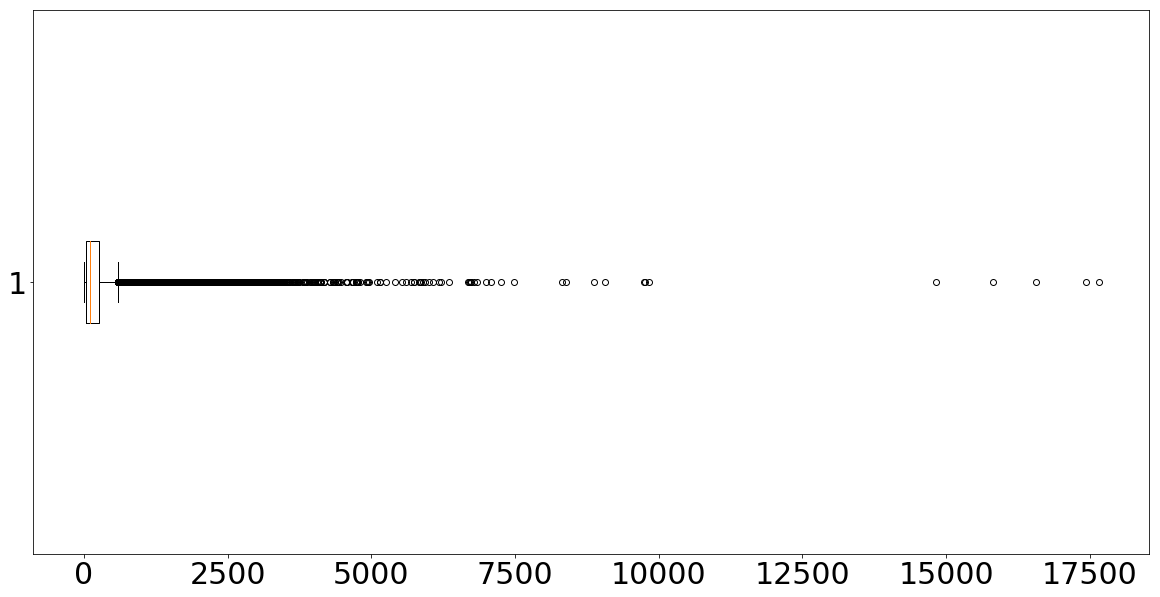

In [19]:
font= {'size': 30}
plt.rc('font',**font)
plt.figure(figsize = (20,10))

plt.boxplot(nb_notes_utilisateur, vert=False)

# Conclusion

Ce qu'il faut retenir de cette première analyse des données.
* il contient beaucoup d'informations (plusieurs dizaines de millions de notes de plusieurs dizaines de milliers d'utilisateurs sur des milliers de films)
* les utilisateurs ont tendance à noter les films qu'ils apprécient (note la plus donnée : 4)
* il y a très peu de notes par utilisateur (75 % ont donné moins de 259 notes sur presque 5 000 films dans cet échantillon)
* ce jeu de données contient quelques intrus au sens statistique avec des utilisateurs ayant donné environ 4 000 notes